# Widrow-Hoff Learning

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from numpy import newaxis
import copy
import random
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline 

It is an approximate steepest descent algorithm. Performance index is the mean square error. 

### ADALINE (ADaptive LInear NEuron) Network and LMS (Least Mean Square error) Algorithm

ADALINE is similar to perceptron except that it's transfer function is linear. LMS is more powerful and less prone to noises than the perceptron learning algorithm.

#### Transfer Function

In [3]:
def purelin(n):
    # w and p are vectors of length n and b is the bias
    # purelin simply return the sum w*p + bias
    return n*1.0


#### Output Functions 

In [4]:
def apply_on_2D(f, n):           # It is called 2D because it is used for 2D weight matrices.
    # f is an numpy array of functions and n is numpy array of neurons' outputs in layer.
    output = n.copy()
    S = len(f)
    for i in range(S):
        output[i] = f[i](n[i])
    return output

# print(apply_on_2D(np.array([logsig, tansig]), np.array([2.0, 0.3])))

def getSingleLayerOutput(f, W, p, b):
    # S is the number of neurons in the layer, R is the number of inputs from previous layer. 
    # funcs or f is the function matrix (Sx1), W is the weight matrix (SxR), inputs or p is the input matrix,
    # biasses or b is the bias matrix.
    # getLayerOuput returns the result (matrix a) obtained by operating functions from funtions matrix 
    # on weights times inputs plus bias. 
    # a = f(n), n = W*p + b, return a. OR n[i] = f[i](W[i]*p + b[i])
    n = W.dot(p) + b
    return apply_on_2D(f.ravel(), n.ravel())[:, newaxis]
     
# f = np.array([logsig, hardlim])[:, newaxis]
# W = np.array([[1, 3, 4], [6, 2, 1]])
# p = np.array([1, 2, 3])[:, newaxis]
# b = np.array([1, 2])[:, newaxis]
# print(getSingleLayerOutput(f, W, p, b))

##### Class

In [5]:
class ADALINENetwork(object):
    # Class contains the following variables:
    # functions - functions[i] is the transfer function of ith neuron
    # weights - weights[i][j] is jth weight for ith neuron.
    # biases - biases[i] is the bias of ith neuron.
    
    def __init__(self, weights, biases, learningRate):
        self.functions = np.array([purelin]*len(weights))[:, newaxis]
        self.weights = weights
        self.biases = biases
        self.learningRate = learningRate
        return
    
    def getNumOfNeurons(self):
        # returns the number of neurons in ith layer
        return len(self.weights)
    
    def getInputSize(self):
        # returns the size of input in network to ith layer
        return len(self.weights[0])
    
    def getFunctions(self):
        return self.functions
    
    def getWeights(self):
        return self.weights
   
    def getBiases(self):
        return self.biases
       
    def getADALINENetworkOutput(self, inputToNet):
        return getSingleLayerOutput(self.functions, self.weights, inputToNet, self.biases)

# TEST
# weights = np.array([[1.5, -1.5, 1], 
#                     [1.1, 3, 2.0], 
#                     [-1.1, -2.3, 4], 
#                     [2.1, 1, 2.3]]) 
# biases = np.array([1, -2, 3, -4])[:, newaxis]
# p = np.array([1, 2, 3])[:, newaxis]

# ADALINETest = ADALINENetwork(weights, biases, 0.02)
# print(ADALINETest.getWeights())
# print(ADALINETest.getSingleLayerNetworkOutput(p))

#### Algorithm

The algorithms gives us following results (when we minimise the error at each iteration) moving in the steepest descent direction:

$$\textbf{W}(k+1) = \textbf{W}(k) + 2 \alpha \textbf{e}(k) \textbf{p}^T(k)$$

$$\textbf{b}(k+1) = \textbf{b}(k) + 2 \alpha \textbf{e}(k)$$

In [6]:
def learn(self, inputToNet, target):
    error = target - self.getADALINENetworkOutput(inputToNet)
    self.weights = self.weights + 2 * self.learningRate * error.dot(inputToNet.transpose()) 
    self.biases = self.biases + 2 * self.learningRate * error
    
ADALINENetwork.learn = learn

Learning rate should satisfy the condition:

$$0 < \alpha < \frac{1}{\lambda_{max}}$$

where $\lambda_i$'s are the eigenvalues of matrix $\textbf{R}$.

### Test 1

In [7]:
weights = np.array([[0, 0, 0]])
biases = np.array([[0]])
learningRate = 0.2  # For this test, it can be computed that 0.5 is max assuming equal probability of samples

inputOneTest1 = np.array([1, -1, -1])[:, newaxis]
targetOneTest1 = np.array([[-1]])
inputTwoTest1 = np.array([1, 1, -1])[:, newaxis]
targetTwoTest1 = np.array([[1]])

ADALINETest1 = ADALINENetwork(weights, biases, learningRate)
for i in range(100):
    randNum = random.random()
    if randNum > 0.5:
        ADALINETest1.learn(inputOneTest1, targetOneTest1)
    else:
        ADALINETest1.learn(inputTwoTest1, targetTwoTest1)

print(ADALINETest1.getADALINENetworkOutput(inputOneTest1))   # EXPECTED = -1
print(ADALINETest1.getADALINENetworkOutput(inputTwoTest1))   # EXPECTED = 1

[[-1.00000002]]
[[ 1.00000001]]


In [8]:
outputWeightsTest1 = ADALINETest1.getWeights()
outputBiasesTest1 = ADALINETest1.getBiases()
print(outputWeightsTest1)      #  EXPECTED = [[0, 1, 0]]
print(outputBiasesTest1)       # EXPECTED = [[0]] 

[[ -2.39087825e-09   1.00000001e+00   2.39087825e-09]]
[[ -2.39087825e-09]]


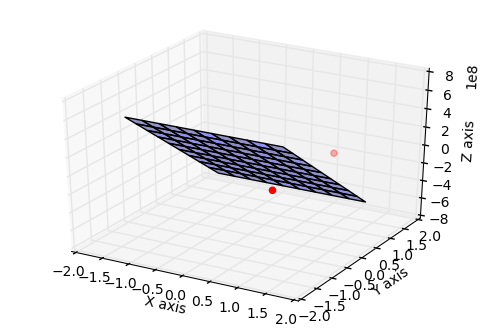

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = np.linspace(-1.4, 1.4, 10)
y = np.linspace(-1.4, 1.4, 10)

X, Y = np.meshgrid(x, y)

Z = - (outputWeightsTest1[0][0] * X + outputWeightsTest1[0][1] 
       * Y + outputBiasesTest1[0][0])/ outputWeightsTest1[0][2]

ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, alpha = 0.4)

x = [1, 1]
y = [-1, 1]
z = [-1, -1]
ax.scatter3D(x, y, z, color = 'red')

ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_zlabel("Z axis")

plt.show()

### Test 2 (6x4 pixel values) - TO BE COMPLETED 

# Adaptive Filtering

### Tapped Delay Line

Tapped Delay Line has a single input $y(k)$ and R outputs $p_1(k)$, $p_2(k)$, ... , $p_R(k)$ given by:

$$p_j(k) = y(k - j + 1)$$

In [12]:
# The function getTappedDelayFunction returns a function that will take initial memory as the input.
# The returned function can be used to get the output for the ADALINE network.

def getTappedDelayFunction(memory):
    def tappedDelayFunction(signalInput):
        for i in reversed(range(1, len(memory)-1)):
            memory[i] = memory[i-1]
        memory[0] = signalInput
        return memory[:, newaxis]
    return tappedDelayFunction

# inputToFilter = getTappedDelayFunction(np.zeros(10))
# print(inputToFilter(1))
# print(inputToFilter(3))
# print(inputToFilter(2))
# print(inputToFilter(6))
# print(inputToFilter(7))

### Adaptive Filter

Adaptive Filter has a Tapped Delay Function whose output is fed to the ADALINE network. This forms a FIR (Finite Impulse Response) filter.

### Adaptive Noise Cancellation

# TO BE COMPELETED AFTER SIGNAL PROCESSING 